In [2]:
import pandas as pd


url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(df.info())

df.head()

df.describe()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
x= df.drop('medv', axis = 1)

y = df['medv']

print(x.head())
print(y.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 404
Testing samples: 102


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(X_test)

In [14]:
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]}")


Predicted: 29.00, Actual: 23.6
Predicted: 36.03, Actual: 32.4
Predicted: 14.82, Actual: 13.6
Predicted: 25.03, Actual: 22.8
Predicted: 18.77, Actual: 16.1


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 24.29
RMSE: 4.93
MAE: 3.19
R² Score: 0.67


In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators= 100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(f"Random Forest R² Score: {r2_score(y_test, rf_pred):.2f}")

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("GradientBoosting R²:", r2_score(y_test, gb_pred))


Random Forest R² Score: 0.89
GradientBoosting R²: 0.9153342280466539


Matplotlib is building the font cache; this may take a moment.


rm         0.503845
lstat      0.309509
dis        0.060549
crim       0.038062
ptratio    0.016313
tax        0.015661
nox        0.015544
age        0.013840
b          0.012154
indus      0.007953
rad        0.003811
zn         0.001756
chas       0.001004
dtype: float64


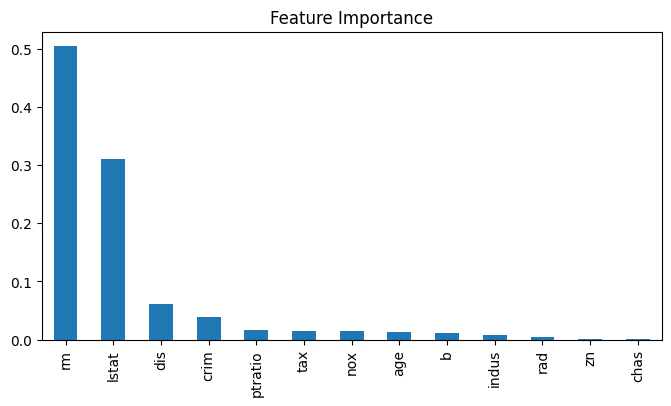

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)

print(feat_imp)

feat_imp.plot(kind='bar', figsize=(8, 4))

plt.title("Feature Importance")
plt.show()


In [22]:
import joblib
joblib.dump(rf_model, "house_price_model.pkl")


['house_price_model.pkl']

In [24]:
print(x.columns)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
